In [1]:
%load_ext autoreload
%autoreload 2

import json, os

import numpy as np
import matplotlib.pyplot as plt

from Experiment import Experiment
from figure_functions import get_plot_options
from architecture.sdg_matrix import return_sdg_matrix
from tensorflow import keras

In [2]:
# Set plot settings
plt.rcdefaults()
full_params, half_params = get_plot_options()
plot_params = full_params.copy()
plot_params['figure.figsize'] = (3.5,4.75)
plt.rcParams.update(plot_params)

In [3]:
random = 'Sys1-Random'
toeplitz = 'Sys1-Toeplitz'
identity = 'Sys1-Paper-Experiment'

# Load up the different experiments for analysis
identity = Experiment(experiment_name=identity, data_file_prefix='S1-NLSL1')
random = Experiment(experiment_name=random, data_file_prefix='S1-NLSL1', results_folder='results/Appendix-Initial-vs-Final')
toeplitz = Experiment(experiment_name=toeplitz, data_file_prefix='S1-NLSL1', results_folder='results/Appendix-Initial-vs-Final')

In [4]:
identity_f = np.abs(identity.L)
random_f = np.abs(random.L)
toeplitz_f = np.abs(toeplitz.L)

identity_0 = np.abs(np.eye(identity_f.shape[0]))
random_0 = np.abs(keras.initializers.he_uniform()(random_f.shape))
toeplitz_0 = np.abs(return_sdg_matrix(toeplitz_f.shape))

In [5]:
mins = [np.min(L) for L in [identity_f, random_f, toeplitz_f, identity_0, random_0, toeplitz_0]]
maxs = [np.max(L) for L in [identity_f, random_f, toeplitz_f, identity_0, random_0, toeplitz_0]]

v_min = min(mins)
v_max = max(maxs)
v_min, v_max

(0.0, 12.166489)

In [6]:
i_min = min([np.min(L) for L in [identity_f, identity_0]])
i_max = max([np.max(L) for L in [identity_f, identity_0]])

r_min = min([np.min(L) for L in [random_f, random_0]])
r_max = max([np.max(L) for L in [random_f, random_0]])

t_min = min([np.min(L) for L in [toeplitz_f, toeplitz_0]])
t_max = max([np.max(L) for L in [toeplitz_f, toeplitz_0]])

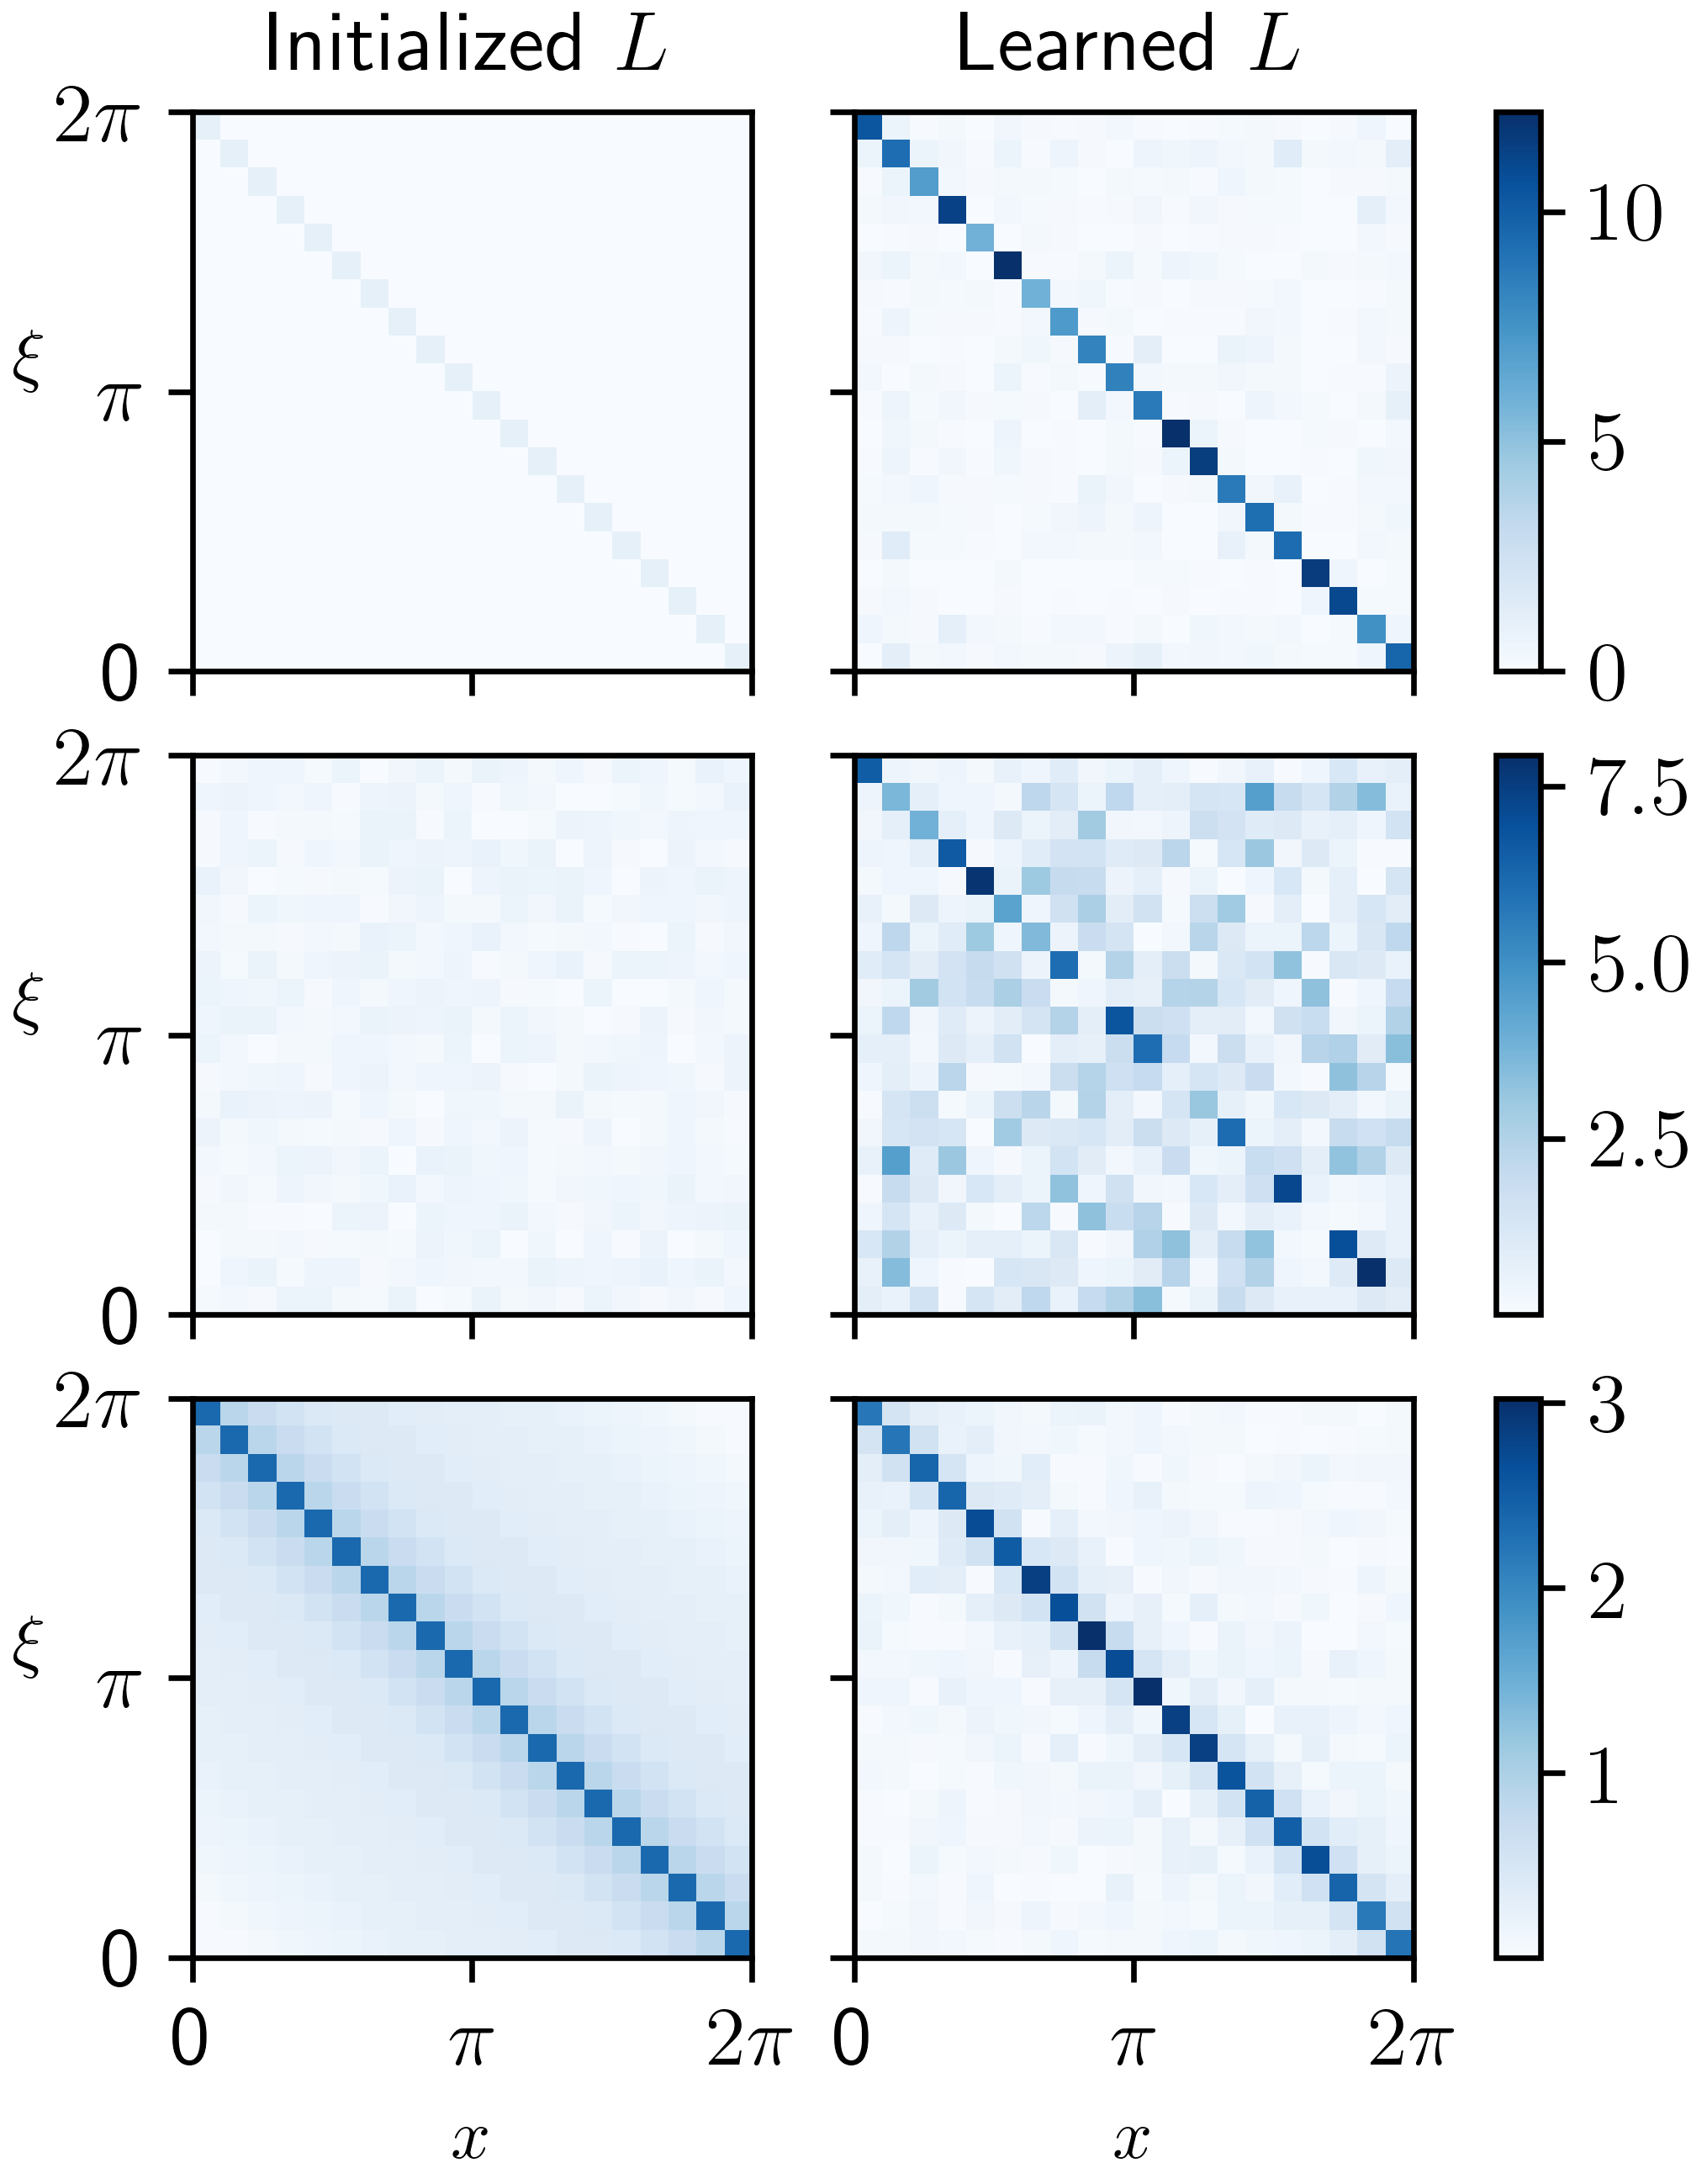

In [7]:
grid = {'hspace':0.15, 'wspace':0.15, 'width_ratios': [4,4,0.3]}
fig, [ax1,ax2,ax3] = plt.subplots(3,3, sharex=False, sharey=False, 
                                  figsize = (3.5,4.75),
                                  gridspec_kw=grid)


# Plot the initial and final operators
opts=dict(extent=(0, 2*np.pi, 0, 2*np.pi), cmap='Blues')

i_img = ax1[0].imshow(identity_0, **opts, vmin=i_min, vmax=i_max)
r_img = ax2[0].imshow(random_0, **opts, vmin=r_min, vmax=r_max)
t_img = ax3[0].imshow(toeplitz_0, **opts, vmin=t_min, vmax=t_max)

ax1[1].imshow(identity_f, **opts, vmin=i_min, vmax=i_max)
ax2[1].imshow(random_f, **opts, vmin=r_min, vmax=r_max)
ax3[1].imshow(toeplitz_f, **opts, vmin=t_min, vmax=t_max)

# Format the axes
ax1[0].set_title(r'Initialized $L$')
ax1[1].set_title(r'Learned $L$')

for ax in [ax1,ax2,ax3]:
    # yticks
    ax[0].set_yticks([0,np.pi,2*np.pi])
    ax[1].set_yticks([0,np.pi,2*np.pi])
    ax[0].set_yticklabels(['0','$\pi$',r'$2\pi$'])
    ax[1].set_yticklabels(['','',''])
    ax[0].set_ylabel(r'$\xi$', rotation=None)
    
for idc in [0,1]:
    ax1[idc].set_xticks([0,np.pi,2*np.pi])
    ax2[idc].set_xticks([0,np.pi,2*np.pi])
    ax3[idc].set_xticks([0,np.pi,2*np.pi])
    ax1[idc].set_xticklabels(['','',''])
    ax2[idc].set_xticklabels(['','',''])
    ax3[idc].set_xticklabels(['0','$\pi$',r'$2\pi$'])
    ax3[idc].set_xlabel(r'$x$')


#cbar_opts={'shrink':0.5, 'aspect': 1, 'fraction':0.3}#, 'location': 'right'}
cbar_opts=dict(shrink=0.1)
for ax, img in zip([ax1, ax2, ax3], [i_img, r_img, t_img]):
    fig.colorbar(img, cax=ax[2], **cbar_opts)
    ax[2].set_frame_on(False)

plt.savefig('./Figures/Fig15-InitialVsLearned.png')